In [714]:
import pandas as pd
pd.options.mode.chained_assignment = None

dataframe = pd.read_csv('youtube_dataset.csv')

# Surface analysis

In [2]:
dataframe.head()

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122


In [3]:
dataframe.describe()

,Likes
count,19300.000000
mean,2142.412642
std,11795.954843
min,0.000000
25%,2.000000
50%,22.000000
75%,260.000000
max,540334.000000


In [4]:
dataframe['Video Name'].value_counts()

Shakira - La La La (Brazil 2014) ft. Carlinhos Brown                                                 200
Eminem - Love The Way You Lie ft. Rihanna                                                            200
Luis Fonsi - Despacito ft. Daddy Yankee                                                              100
Queen – Bohemian Rhapsody (Official Video Remastered)                                                100
CAN&#39;T STOP THE FEELING! (From DreamWorks Animation&#39;s &quot;Trolls&quot;) (Official Video)    100
                                                                                                    ... 
Romeo Santos - Propuesta Indecente (Official Video)                                                  100
Imagine Dragons - Believer                                                                           100
Jennifer Lopez - On The Floor ft. Pitbull                                                            100
CNCO - Reggaetón Lento (Bailemos)                      

In [5]:
len(dataframe['Video Name'].unique())

191

In [6]:
len(dataframe['Channel Name'].unique())

117

<AxesSubplot:>

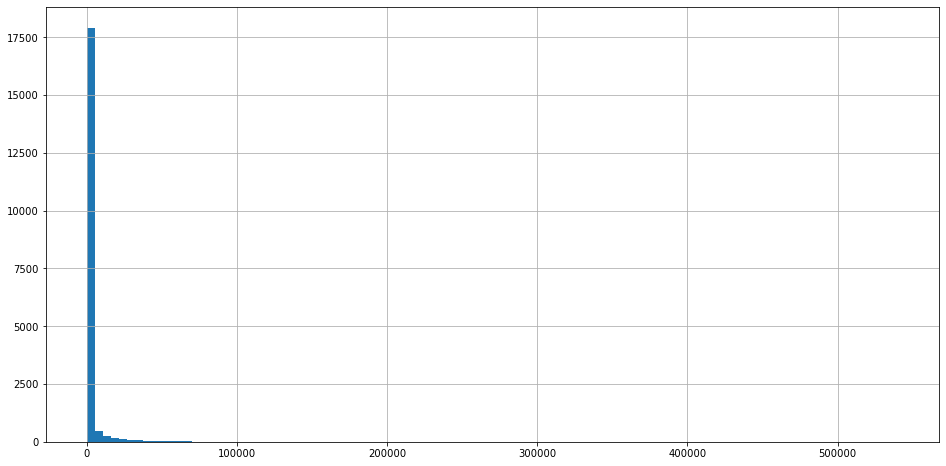

In [7]:
dataframe['Likes'].hist(figsize=(16, 8), bins=100)

# Text cleaning

In [720]:
# remove all not english languages, replace bad encoding
def preprocess_text(text):
    import re
    
    text = text.replace('\n', '. ')
    text = text.replace('\r', '. ')
    text = text.replace('\t', ' ')
    
    text = text.replace('\u3000', ' ')
    text = text.replace('\u200d', ' ')
    text = text.replace('\xa0', ' ')
    text = text.replace('\u2002', ' ')
    text = text.replace('\u2008', ' ')
    text = text.replace('\u2003', ' ')
    text = text.replace('\u200a', ' ')
    text = text.replace('\u200b', ' ')
    text = text.replace('\u2066', ' ')
    text = text.replace('\ufeff', ' ')
    text = text.replace('\u2069', ' ')
    text = text.replace('\U000e007f', ' ')
    
    text = text.replace('\U000e0067', 'g')
    text = text.replace('\U000e0062', 'b')
    text = text.replace('\U000e0077', 'w')
    text = text.replace('\U000e006c', 'l')
    text = text.replace('\U000e0073', 's')
    text = text.replace('\U000e0074', 't')
    text = text.replace('\U000e0063', 'c')
    
    text = text.replace('—', '-')
    
    # TODO: remove entries entirely, if they contain following characters?    
    text = re.sub(r'[а-яА-Я]', '', text)
    text = re.sub(r'[óèâúçãÉńñёÙåôàÆÊÒÖûéíêÚáÁāυοÕÇάσōÓÍęċďέήίόіїìîùÜǐǎğÃŌİõăśäöëćÑü]', '', text)
    text = re.sub(r'[हिशকরনতভশিুਕਤਭਰਲਸ਼ਾੁসমलતसभ्नाैીमলো્तુ্যરহòભાरकोাશ]', '', text)
    #text = re.sub(r'[⠷⠋⣿⣼⡀⠸⣧⣤⣠⣀⣄⡤⠛⢀⣇⠟⡟⢹⡄⢿⠁⣸⣦⢻⠘⠙⠉⢰⠃⠇⠿⢠⢸⣶⠀⠈⡿⡏⣷⢤⣾⠆⣴⠒⡇⠻⣂⢖⠭⠤⠠⣆⡻⠄⠂⣰⢟⡠⢋⢶⢷⣯⣻⡑⠌⠲⣁⡛⡹⠏⢢⠹⠺]', '', text)
    text = re.sub(r'[ァアィイゥウェエォオカガキクグゲコゴサザシジスズゼタダッテデトドナニノハバパヒフブプヘベホマミムメモャラリルロワンー]', '', text)
    text = re.sub(r'[،ءآأؤإئابةتثجحیښु٩ہ۵پीخدذرزسشصضطعغفقكلمنهوىي]', '', text)
    text = re.sub(r'[축하합니다당신은그많은영어중에한국어를찾았습니다안녕하세요跡せ用聞핑味Ɔ意深自学語Λ（レ思授크セず英会え出敵分と痕業랙わ探！中残幸£小笑声）블]', '', text)
    text = re.sub(r'[日本人居るなら高評価押この曲드생글유서후술온댓히각발잘개자갑미の曲名知らなかったけどすご⌒べめやよろツネ・丁个么了丿ﾚヽﾉ／つ＼、＿へ⊂く良い曲です。こんにちは]', '', text)
    text = re.sub(r'[금보사가직람첵주래새나록거도얼이눌되욬좀오기으셈아돋고무켘억좋노는날들´네지출옛러ㅋ마너인]', '', text)
    text = re.sub(r'[伴上之谊生갈ㅓ만비라在侣싶吧和继同画并，的友续걸与走忆这我린进뜯爱刻昨永旅活본一天您起건们行远冒险情前回点]', '', text)
    text = re.sub(r'[懂宇那难首西又言午夏年班詞洲控躁后安涩拉时动闷佛牙少己梁神晦涵变切教共美調都热仿多成晚听当遥見语你後先到是]', '', text)
    text = re.sub(r'[をだ来私もはしてみきさ冥好が感おん歌晴福り素更大祈今動ま]', '', text)
    text = re.sub(r'[ຍີບ្សួສດາະ]', '', text)
    text = re.sub(r'[אדהוילםעש]', '', text)
    text = re.sub(r'[നപയരറലളവസഹാിുെേൊോ്ൻൽඅඇඉඋඑඔඕකගඟචටඩතදනඳපබමයරලවසහළෆ්ාැිීුෙේොดตรวสัาิี์๑ຶ༎༻࿐ကငညပယလသဟါာုေံး်აბგდევიმორსღშჯሊላሌልመምሰትነእካው]', '', text)
    text = re.sub(r'[ظِஇஉஎகஙசஞடணதனபமயரலளவாிுேை்తభరలశహాిుో్ಂಅಉಎಒಗಚಡತಥದನಪಫಬರಲವಸಹಿೂೆೇೊ್ംആഇഐഒകങടത]', '', text)
    text = re.sub(r'[αγδεζηθικλμνπρςτφχω]', '', text)
    text = re.sub(r'[×æøĺľŞşżžƏɖəɛɦɨɮʊʋʍʖʜΓҚқүәөԲՁագեզիշռրւքօ]', '', text)
    
    text = re.sub(r' {2,}', ' ', text)
    text = re.sub(r'\.\.', '.', text)
    text = text.strip()
    return text

dataframe['Comment'] = dataframe['Comment'].apply(preprocess_text)
dataframe = dataframe[dataframe['Comment'] != '']
dataframe = dataframe.drop_duplicates(subset='Comment')

In [722]:
import re

full_corpus = ' '.join(dataframe['Comment'].values)
symbols = re.sub(r'[_’`”“a-z♀¡¿…┈A-Z‘0-9 \.@,#$%!\-?🇱🇭🇰ˆ̶͜͡🇳🇷ΗØ¶ºΙ؟តីុូᴗᴜᴠ‐―ᴥΜΧ🇾🇩🇮🇻‚„⁉⁰€⃝⃤℅↻└〜〰ꈍ🇵𝗔𝗙𝗛𝗡𝗮𝗯꧁꧂︾？＾｢｣･ﾟ𝙵𝚂𝗱𝗲𝗴𝗹𝗺𝗻⠷⠋⣿⣼⡀⠸⣧⣤⣠⣀⣄⡤⠛⢀⣇⠟⡟⢹⡄⢿⠁⣸⣦⢻⠘⠙⠉⢰⠃⠇⠿⢠⢸⣶⠀⠈⡿⡏⣷⢤⣾⠆⣴⠒⡇⠻⣂⢖⠭⠤⠠⣆⡻⠄⠂⣰⢟⡠⢋⢶⢷⣯⣻⡑⠌⠲⣁⡛⡹⠏⢢⠹⠺𝗼𝗿𝘂𝘆🇿🇺🇫🇯🇸⚖¥¨©¬¯²⚔☻✏⚜◢☁♬☑❇▽☄⬆❆☮♔▕⏳◤↑↘↙●⚕❧✿♻⇆∆∴⌓⚠✉☠➡♣🇦🇴🇲🇨𝓼𝓲𝓔𝓽𝓪𝓗𝓵𝓰𝓝𝓸𝕘𝕣𝕝𝕥𝕚𝕨𝕒𝕤𝕠𝕖🇬ɪʟᴏғᴄɢı🇪🇽🇶🇶🇶🇼🇹🇧=/@"|^&𝖃*\(\)-:🎟％;\'<>~\\\[\]«»•┃╔╯╣┳╬ㅤ─➖🔘🍯╠Σ🐍◁❚❚▷༒🦅←💬☺☀✦˚┣┻┫═→╝║╩╗♡╭┏\}°┛┗ʏʀᴛɴᴡᴇ𝚆𝙴❣√𝙳𝚁ＲＴＥＣＦＰ𝙼𝙰𝙱𝙽𝚃𝑠𝑑𝑖𝑒𝚈ʙ🄽🄻🄴🄼🄰🅈🄳🅁✖‿🄿🕊🅂ᴍᴅᴀ╦★┓╮╰━╚⤵✓☹^✈˘▾🗡‼–‼♪♫♂♪{👯👁⬇💂🌕🌑🎩👶🔫🎆🌐🔔⚓❄🦠🧢🐇🗣🤛🍁🎂➕🦊🐶🐺🦉🏳🖕✝🐕🌪🌀🏥💉🤫📸🥇👽😨🧪🐻🖒🌗🥂👼📷🌓🧸📜💧💓😴🙅🐼🌍😚🌬🤕🚢🤪🚫🦲🤚🌴💅☆🤷😵ًًًًًًًًًًًًًًًً🌺🦄🦁🐱🆙🆙🆙🆙🆙🔝👨👬👭🎸🍍👂📻🐛🌸🙂💲💶😮🌚💑😏💢💌⛷👪👣🍂🌇🌅🌋🍩👋🤘🤬😄😤💩🤝💏😍🤤😋💎📌😛😘💸💵🏊🥶🙆🤴🏰🐬🤡✍🔯🪐💀🌎🌊👸🎀👩🧔👗👕👖🌏👌😼🧚🎁🔴😽🎉💝😥😌🤸😕🎹🤍🆚😟👄😯🎤🕺🎼🦋😷😂🏴🏫🤙🤠🥰🔒😃✌🍕😹😔👊🔞👉☝💫🙃🤯✨🍃🌲💯😈🤟🥴🏾🥵💁😬🏽🖤⭕💞👏🙀♥🧡🤧😜🌹🤗😞🤜✊🤭😑😰😣😉😩🤩😐😶🏻🔰🙌🏼😻😆😓👍💪🌻🤔😡🌟😎🤑✋💊✅💘😀😁💔🔼💃😇🤐😊😒🐯💥🍀💋🔓🥳🤦🔐❤️🌝❌😪⭐😸🌳😙🙋🏆🔆🖐🙄😠🙁🧐💣❓↓⚡✔👎🎊😖🧨💜😧🏁😗🎧🤞💕💟😫︎👈💗📁❗☘🚀🚨🐈🙈🏛💰❦🍻🍸📂👹🌖🌒🌘🌞🎡📖⚰📚💭🐖📖👫🦳👵👻☣🌞🌈🌔😭😢💙👀🎵💚💛💖🙏😲😳😱🥺👇👑🎶🌼🔥😝😅🌌🥱👮🥍🏅🎖👅💐🕉🤓🎈🃏🐒🎲📝🧟🗽🚲🎙🦡🍾🔊🧏🎇💍🌡🧘😦🚒👆👦🐓🕵🎌🐅🚪🕶🧙🥁💦🗿🐰🔇🎫🏏🌠🍿🏿🐐👐🤨🤳🐘🤹🗝🕴🍒📍🔪🗞🏎🗯🍷💨🤰😿🙊🦦🤣]', '', full_corpus)
#symbols = ''.join(set(symbols))
#symbols = list(set(symbols))
#symbols.sort()
#symbols = ''.join(symbols)
symbols

''

# Metadata calculations

In [763]:
import re

metadata_df = dataframe[['Comment', 'Likes']]
metadata_df.columns = ['comment', 'likes']

metadata_df['len'] = metadata_df['comment'].map(len)
metadata_df['word_count'] = metadata_df['comment'].apply(lambda x: len(x.split()))
metadata_df['unique_word_count'] = metadata_df['comment'].apply(lambda x: len(set(x.split())))
metadata_df['sentence_count'] = metadata_df['comment'].apply(lambda x: len(re.split(r'\.|!|\?', x)) if any((char for char in x if char in '.!?')) else 1)

metadata_df['is_caps'] = metadata_df['comment'].apply(lambda x: 1 if x.isupper() else 0)
metadata_df['is_lower'] = metadata_df['comment'].apply(lambda x: 1 if x.islower() else 0)
metadata_df['is_alnum'] = metadata_df['comment'].apply(lambda x: 1 if x.isalnum() else 0)

metadata_df['symbols_count'] = metadata_df['comment'].apply(lambda sentence: sum(1 for char in sentence if not char.isalnum()))
metadata_df['numbers_count'] = metadata_df['comment'].apply(lambda sentence: sum(1 for char in sentence if char.isnumeric()))
metadata_df['upper_count'] = metadata_df['comment'].apply(lambda sentence: sum(1 for char in sentence if char.isupper()))

In [764]:
from collections import Counter

full_corpus = ' '.join(metadata_df['comment'].values)
word_counter = Counter()

def clean_word(word):
    word = word.lower()
    word = re.sub(r'[^a-z0-9]', '', word)
    return word

for word in full_corpus.split():
    word = clean_word(word)
    if word != '':
        word_counter[word] += 1
                
word_counter_dict = {word: count for word, count in word_counter.most_common()}
word_frequency_df = pd.DataFrame(word_counter.most_common())
word_frequency_df.columns = ['word', 'count']

q65 = word_frequency_df['count'].quantile(0.65)
q85 = word_frequency_df['count'].quantile(0.85)
q95 = word_frequency_df['count'].quantile(0.95)

categories = {
    'top5': (q95, 10**10),
    'top15': (q85, q95),
    'top35': (q65, q85)
}

def define_word_quantile(entry, category):
    category_min, category_max = categories[category]
    counter = 0
    for word in entry.split():
        word = clean_word(word)
        if word == '':
            continue
        count = word_counter_dict[word]
        if count >= category_min and count < category_max:
            counter += 1
    
    return counter

metadata_df['word_top5_count'] = metadata_df['comment'].apply(lambda entry: define_word_quantile(entry, 'top5'))
metadata_df['word_top15_count'] = metadata_df['comment'].apply(lambda entry: define_word_quantile(entry, 'top15'))
metadata_df['word_top35_count'] = metadata_df['comment'].apply(lambda entry: define_word_quantile(entry, 'top35'))

In [781]:
def get_word_length_stats(entry):
    import numpy as np
    
    words = [clean_word(word) for word in entry.split()]
    word_lengths = [len(word) for word in words if word != '']
    
    if not word_lengths:
        return 0, 0, 0, 0
    
    q50 = np.quantile(word_lengths, 0.5)
    q85 = np.quantile(word_lengths, 0.85)
    q95 = np.quantile(word_lengths, 0.95)
    max_len = max(word_lengths)
    return round(q50, 2), round(q85, 2), round(q95, 2), max_len

metadata_df['word_len_q50'], metadata_df['word_len_q85'], metadata_df['word_len_q95'], metadata_df['word_len_max'] = zip(*metadata_df['comment'].apply(get_word_length_stats))

In [782]:
metadata_df.describe()

,likes,len,word_count,unique_word_count,sentence_count,is_caps,is_lower,is_alnum,symbols_count,numbers_count,upper_count,word_top5_count,word_top15_count,word_top35_count,word_len_q50,word_len_q85,word_len_q95,word_len_max
count,17432.000000,17432.000000,17432.000000,17432.000000,17432.000000,17432.000000,17432.000000,17432.000000,17432.000000,17432.000000,17432.000000,17432.000000,17432.000000,17432.000000,17432.000000,17432.000000,17432.000000,17432.000000
mean,2190.113297,123.386358,23.845457,16.755564,4.652249,0.030289,0.105840,0.002639,31.846432,2.362150,6.879475,17.774438,2.222522,1.166074,4.021914,6.194080,7.530278,8.603086
std,12137.426054,357.136626,69.578144,29.857335,19.242141,0.171387,0.307641,0.051303,109.022076,63.891699,29.584245,51.450968,7.072365,13.199589,1.168008,1.664202,2.130495,3.181132
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,47.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.000000,6.000000,0.000000,0.000000,3.500000,5.000000,6.450000,7.000000
50%,21.000000,63.000000,12.000000,12.000000,2.000000,0.000000,0.000000,0.000000,14.000000,0.000000,2.000000,10.000000,1.000000,0.000000,4.000000,6.000000,7.400000,8.000000
75%,272.000000,90.000000,18.000000,16.000000,3.000000,0.000000,0.000000,0.000000,21.000000,1.000000,4.000000,14.000000,2.000000,1.000000,4.000000,7.000000,8.550000,10.000000
max,540334.000000,10480.000000,1879.000000,1497.000000,1035.000000,1.000000,1.000000,1.000000,3413.000000,5924.000000,1710.000000,1357.000000,177.000000,960.000000,36.000000,36.000000,89.650000,115.000000


# Metadata visualization with TSNE

In [870]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline

def plot_meta(tsne_vectors, clustering=None):
    plt.figure(figsize=(16, 12))
    
    if clustering is not None:
        for cluster in set(clustering):
            idx = clustering == cluster
            plt.scatter(tsne_vectors[idx, 0], tsne_vectors[idx, 1], label=cluster, s=5) 
            
        plt.legend()
    else:
        plt.scatter(tsne_vectors[:,0], tsne_vectors[:,1], s=5)
        
    _ = plt.show()
    
    
def check_cluster(clustering, cluster):
    cluster_idx = clustering == cluster
    excerpt_df = metadata_df[cluster_idx]
    print(len(excerpt_df.index))
    return excerpt_df

In [844]:
import numpy as np
from sklearn.preprocessing import minmax_scale

def get_multidimensional_coordinates(row):
    dimensions = row.keys()[1:]
    coordinates = [row[dim] for dim in dimensions]
    return coordinates

metadata_vectors = metadata_df.apply(get_multidimensional_coordinates, axis=1)
vectors = np.stack(metadata_vectors, axis=0)
vectors = minmax_scale(vectors)

vectors.shape

(17432, 18)

In [846]:
tsne = TSNE(n_components=2, perplexity=15, random_state=0, verbose=2)
tsne_vectors = tsne.fit_transform(vectors)

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 17432 samples in 0.001s...
[t-SNE] Computed neighbors for 17432 samples in 5.965s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17432
[t-SNE] Computed conditional probabilities for sample 2000 / 17432
[t-SNE] Computed conditional probabilities for sample 3000 / 17432
[t-SNE] Computed conditional probabilities for sample 4000 / 17432
[t-SNE] Computed conditional probabilities for sample 5000 / 17432
[t-SNE] Computed conditional probabilities for sample 6000 / 17432
[t-SNE] Computed conditional probabilities for sample 7000 / 17432
[t-SNE] Computed conditional probabilities for sample 8000 / 17432
[t-SNE] Computed conditional probabilities for sample 9000 / 17432
[t-SNE] Computed conditional probabilities for sample 10000 / 17432
[t-SNE] Computed conditional probabilities for sample 11000 / 17432
[t-SNE] Computed conditional probabilities for sample 12000 / 17432
[t-SNE] Computed conditional probabilities for sam

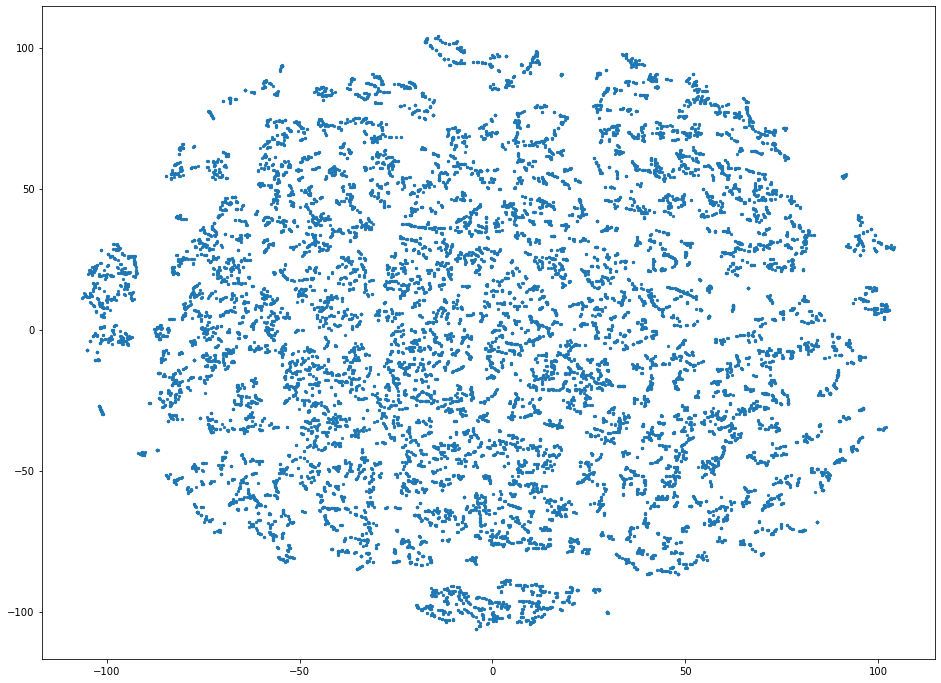

In [847]:
plot_meta(tsne_vectors)

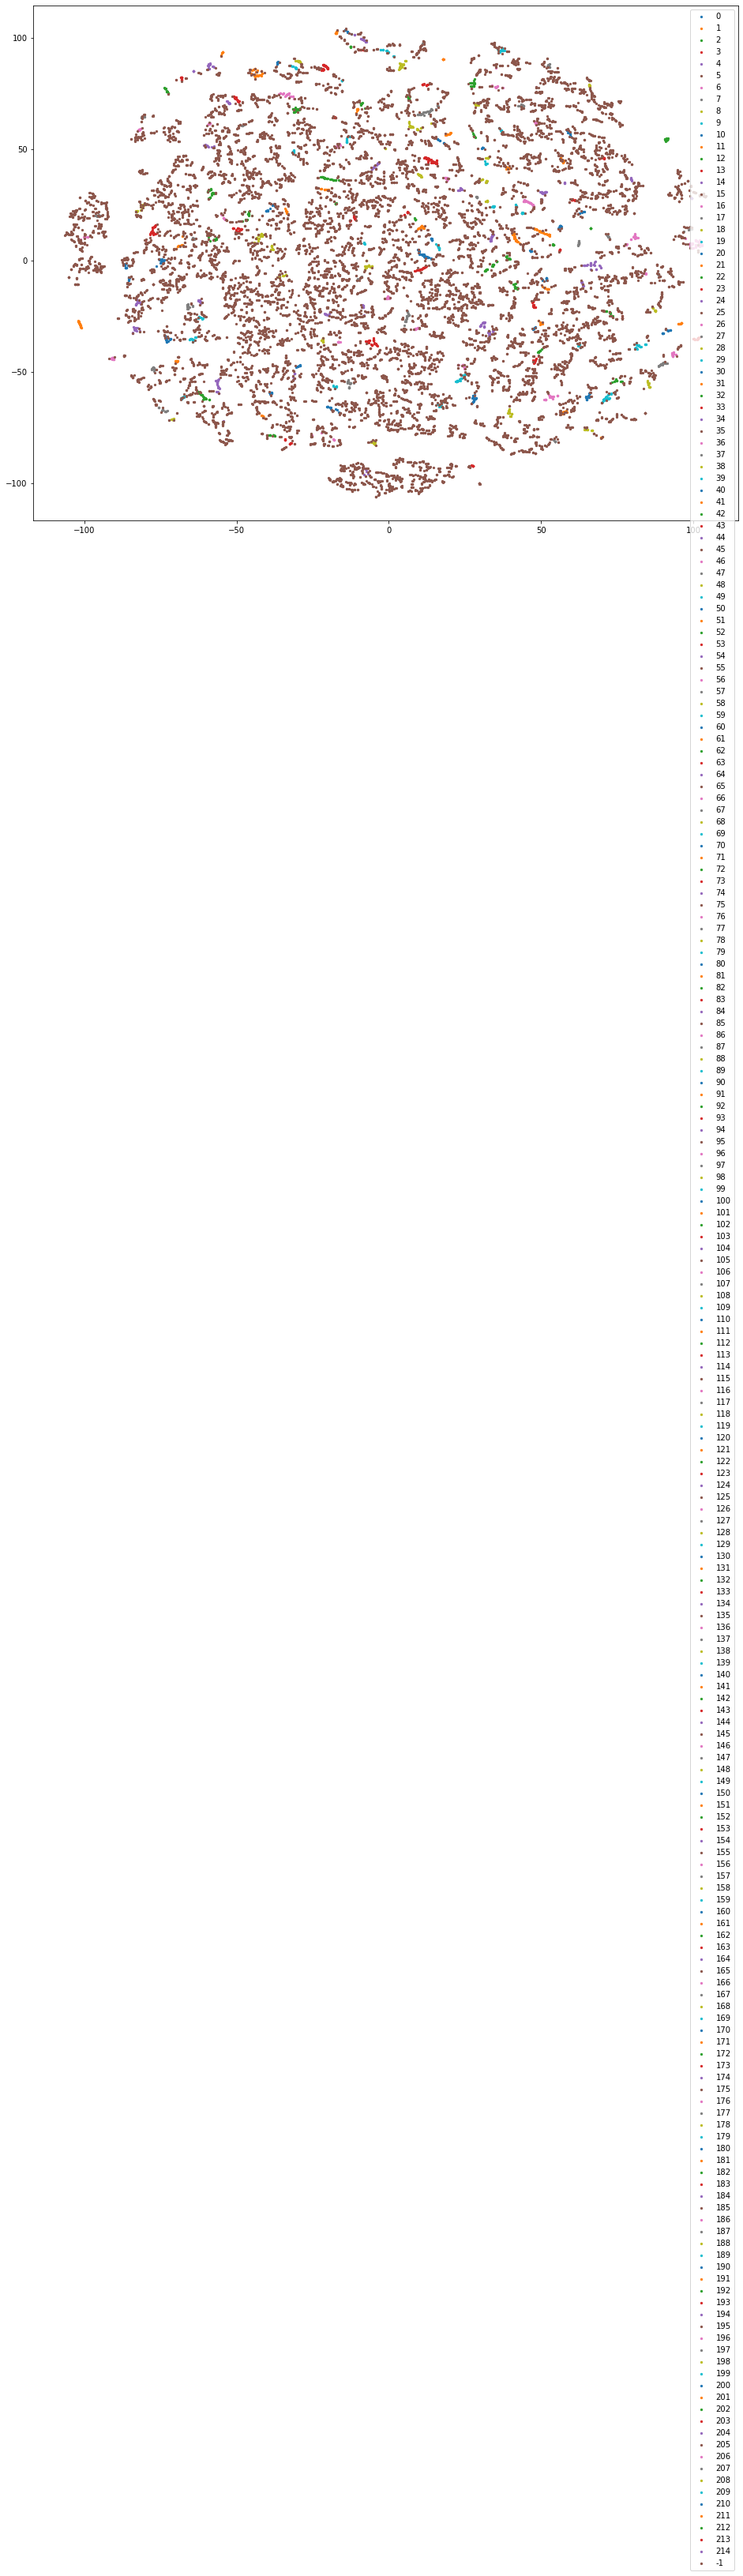

In [863]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=10)
optics_clustering = optics.fit_predict(vectors)

plot_meta(tsne_vectors, optics_clustering)

In [874]:
check_cluster(optics_clustering, 1).sample(n=10).head(10)

32


,comment,likes,len,word_count,unique_word_count,sentence_count,is_caps,is_lower,is_alnum,symbols_count,numbers_count,upper_count,word_top5_count,word_top15_count,word_top35_count,word_len_q50,word_len_q85,word_len_q95,word_len_max
16156,Fun fact taylor and that boy r wearing same pl...,3,65,13,13,1,0,0,0,12,0,1,11,1,0,4.0,6.0,6.40,7
2016,You can refuse to believe that this song is al...,292,63,13,13,2,0,0,0,13,1,1,12,1,0,4.0,6.0,6.40,7
13364,"Lyrics:. . Ahhhhh, who am I kidding, you don’t...",1,56,11,11,3,0,0,0,16,0,3,8,1,0,4.0,6.0,6.55,7
15010,Slash is the coolest person to ever walk on th...,56,71,14,14,2,0,0,0,15,0,1,12,1,1,4.0,6.0,6.35,7
18063,This is very cooool. I listen whit my friends ...,2,60,12,12,2,0,0,0,14,0,3,8,1,0,4.0,6.0,6.50,7
7957,The moment you realise that the song is more f...,1,66,13,12,1,0,0,0,12,0,1,12,1,0,4.0,6.0,6.40,7
2438,So many people see this song as their future w...,3,60,11,11,1,0,0,0,13,0,1,10,1,0,4.0,6.0,6.50,7
16163,This music video was and still is better than ...,2,72,14,14,1,0,0,0,15,0,2,12,1,0,4.0,6.0,6.40,7
16608,The people who vibe to this song but don't kno...,687,70,14,14,1,0,0,0,14,0,1,13,1,0,4.0,6.0,6.35,7
10332,But they couldn't even get Selena a better wig...,38,50,10,10,2,0,0,0,13,0,2,8,1,0,4.0,6.0,6.60,7


In [841]:
check_cluster(optics_clustering, 6).iloc[8]['comment']

"To the 1% that read this:. Your skin isn’t paper, don’t cut it. Your face isn’t a mask, don’t cover it. Your body isn’t a book, don’t judge it. Your heart isn’t a door, don’t lock it. Your life isn’t a movie, don’t end it. . You are you, and you’re beautiful the way you are. There are at least 2 people in this world that would sacrifice themselves for your living. . . Be proud of yourself, be you. Express your feeling and show that you are great, because you certainly are. . . Study hard, push yourself, and you will achieve your goals. Keep fit, eat healthy and keep hygiene. We can get through COVID-19 together!. . And if you are that awesome that you read the whole paragraph, I am a young music creator trying to make a change! And it's my dream to help people's lives with my music! <3. Thank you and have a great day! Take care!"

In [852]:
len(check_cluster(optics_clustering, 93))

518

In [854]:
len(metadata_df[metadata_df['is_caps'] == 1])

528

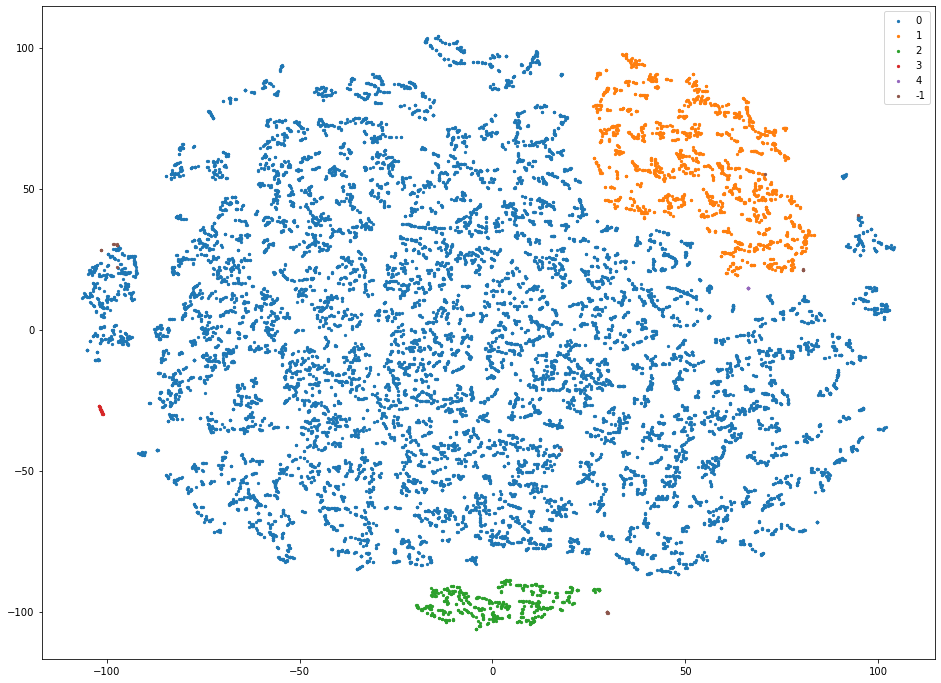

In [864]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=10)
dbscan_clustering = dbscan.fit_predict(vectors)

plot_meta(tsne_vectors, dbscan_clustering)

In [872]:
check_cluster(dbscan_clustering, 4).sample(n=5).head(5)

10


,comment,likes,len,word_count,unique_word_count,sentence_count,is_caps,is_lower,is_alnum,symbols_count,numbers_count,upper_count,word_top5_count,word_top15_count,word_top35_count,word_len_q50,word_len_q85,word_len_q95,word_len_max
1651,throwback,405,9,1,1,1,0,1,1,0,0,0,0,1,0,9.0,9.0,9.0,9
4620,temaiken,1172,8,1,1,1,0,1,1,0,0,0,0,0,0,8.0,8.0,8.0,8
8501,shaky,1796,5,1,1,1,0,1,1,0,0,0,0,1,0,5.0,5.0,5.0,5
6456,biennnnnnnnn,3,12,1,1,1,0,1,1,0,0,0,0,0,0,12.0,12.0,12.0,12
8555,comparte,2826,8,1,1,1,0,1,1,0,0,0,0,0,1,8.0,8.0,8.0,8
